<a href="https://colab.research.google.com/github/vn322/Synergy_DBM_301_CS/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем библиотеки присвоив им кодовые обозначения для краткости написани в дальнейшем

In [1]:
import pandas as pd
import numpy as np

Две основные структуры данных Pandas:

 - Series (одномерная) 
 - DataFrame (двухмерная, для нескольких Series)
 
обрабатывают подавляющее большинство типичных задач в финансах, статистике, социальных науках и многих областях техники. Pandas построен на основе NumPy и предназначен для  интеграции  научных вычислений со многими другими  библиотеками. Pandas предназначен для работы с табличными или разнородными данными. NumPy, напротив, лучше всего подходит для работы с однородными числовыми массивами данных. Став проектом с открытым исходным кодом в 2010 году, Pandas превратилась в довольно большую библиотеку, применимую в широком наборе реальных вариантов использования.



In [2]:
my_list = [1,2,3,4]
my_list

[1, 2, 3, 4]

In [3]:
numpy_array_from_list = np.array(my_list)
numpy_array_from_list

array([1, 2, 3, 4])

 Pandas Series представляет собой одномерный массив, объект, содержащий последовательность значений (аналогичных типами Numpy), и соответствующий массив меток данных, называемый его индексом..



Чтобы создать серию нужно вызвать:
```
s = pd.Series(data, index=index)
```

`data` может быть представлена различными данными:
1. Python dict, Python list
2. NumPy array
3. Неизменяемые типы

Типы данных бывают изменяемые и неизменяемые (mutable и immutable). К неизменяемым относятся целые числа (int), числа с плавающей запятой (float), булевы значения (bool), строки (str), кортежи (tuple). К изменяемым — списки (list), множества (set), байтовые массивы (byte arrays) и словари (dict).

`index` - это список индексов, если его не передавать, то индексы будут созданы автоматически  по умолчанию,  из целых чисел от 0 до N-1 (где N — длина данных)

In [4]:
pd.Series(1)

0    1
dtype: int64

In [6]:
pd.Series((1,2,'three'))

0        1
1        2
2    three
dtype: object

In [7]:
pd.Series(my_list)

0    1
1    2
2    3
3    4
dtype: int64

In [8]:
pd.Series(numpy_array_from_list)

0    1
1    2
2    3
3    4
dtype: int64

Индексы формируются автоматически путём простой нумерации, но есть возможность создать список индексов.

In [9]:
pd.Series(['А.В.С', 1, 0.4], index=['ФИО', 'Место', 'Результат'])

ФИО          А.В.С
Место            1
Результат      0.4
dtype: object

Если не будем передавать индексы, то pandas посчитает, что ключи - это индексы, а значение - это значения серии.

In [10]:
d = {'Иван': 1, 'Николай': 2, 'Борис': 3}

pd.Series(d)

Иван       1
Николай    2
Борис      3
dtype: int64

Индексы можно формировать принудительно, например штатной функцией `pandas.RangeIndex` можно создать индексы начинающиеся с любого числа и имеющие различный шаг. Например создадим индексы из нечётных чисел

In [17]:
s = pd.Series(np.random.randint(5, size=(3)))
s.index = pd.RangeIndex(start=1, stop=6, step=2)
s

1    0
3    3
5    3
dtype: int64

Если передавать индексы, то по ним будут искаться значения в словаре.

Если такого ключа в словаре не найдется, то поставится `NaN` - это маркер для обозначения пропущенного объекта.

In [ ]:
d = {'Иван': 1, 'Николай': 2, 'Борис': 3}

pd.Series(d, index=['Борис', 'Иван', 'Олег'])

Борис    3.0
Иван     1.0
Олег     NaN
dtype: float64

Индексы можно менять различными способами, например с помощью команды `reindex`

In [18]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [19]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

Для упорядоченных данных, например временных рядов, может быть желательно выполнить  интерполяцию (заполнение недостающими значениями) при переиндексации. 

Например мы фиксировали момент времени смены тактической ситуации в игре и знаем, что после подготовки на 4-й минуте начался бой который завершился отступлением на 8-й минуте и для дальнейшей работы нам нужно, чтобы каждая минута была указана в набое данных.

In [20]:
obj3 = pd.Series(['подготовка', 'бой', 'отступление'], index=[0, 3, 7])
obj3

0     подготовка
3            бой
7    отступление
dtype: object

In [ ]:
obj3.reindex(range(8), method='ffill')

0     подготовка
1     подготовка
2     подготовка
3            бой
4            бой
5            бой
6            бой
7    отступление
dtype: object

Объекты Series можно объединять по индексам

In [24]:
s1 = pd.Series({'Иван': 330.0, 'Николай': 160.0})
s1

Иван       330.0
Николай    160.0
dtype: float64

In [25]:
s2 = pd.Series({'Иван': 345.0, 'Николай': 200.0, 'Роман': 30.0})
s2

Иван       345.0
Николай    200.0
Роман       30.0
dtype: float64

Если при объединении возникнет ситуация неопределённости, то значение по индексу будет заменено на NaN

In [26]:
s1.combine(s2, max)

Иван       345.0
Николай    200.0
Роман        NaN
dtype: float64

В этом случае можно принудительно придать значение данной ячейке

In [29]:
s1.combine(s2, max, fill_value=0)

Иван       345.0
Николай    200.0
Роман       30.0
dtype: float64

DataFrame - это двумерная структура данных, где могут содержаться колонки с разными типами данных. Это очень похоже на таблицу.

Так же как и серии, DataFrame принимает много различных типов данных для создания:
1. Dict 1D np.arrays, lists, dicts или Series
2. 2-D np.array
3. Структурированный массив
4. Series
5. Другой DataFrame


Можно создать таким образом:
```
pd.DataFrame(data, index=index, columns=columns)
```

Вместе с данными data, можно опционально передавать индексы и столбцы.


Посмотрим на некоторые способы создания DataFrame.

Одним из часто используемых способов является загрузка данных по ссылке и большинство форматов будут доступны для такого способа, можно например использовать файлы EXEL(xls, xlsx, xlsm, xlsb, odf, ods, odt) командой `pandas.read_excel` так же доступно преобразование таких популярных форматов как CSV и TXT

In [34]:
lol = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
display(lol.head(3), lol.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


None

|index|gameId|blueWins|blueWardsPlaced|blueWardsDestroyed|blueFirstBlood|blueKills|blueDeaths|blueAssists|blueEliteMonsters|blueDragons|blueHeralds|blueTowersDestroyed|blueTotalGold|blueAvgLevel|blueTotalExperience|blueTotalMinionsKilled|blueTotalJungleMinionsKilled|blueGoldDiff|blueExperienceDiff|blueCSPerMin|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|0|4519157822|0|28|2|1|9|6|11|0|0|0|0|17210|6\.6|17039|195|36|643|-8|19\.5|
|1|4523371949|0|12|1|0|5|5|5|0|0|0|0|14712|6\.6|16265|174|43|-2908|-1173|17\.4|
|2|4521474530|0|15|0|0|7|11|4|1|1|0|0|16113|6\.4|16221|186|46|-1172|-1033|18\.6|

Можно использовать массив Numpy

In [36]:
pd.DataFrame(numpy_array_from_list)

,0
0,1
1,2
2,3
3,4


Здесь используется заполнение числами от 0 до 8, подобное может использоваться для создания "шаблона" таблицы в которую потом будут заноситься данные

In [37]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)), 
                     index=['пехота', 'стрелки', 'маги'], 
                     columns=['Люди', 'Орки', 'Эльфы'])
frame

,Люди,Орки,Эльфы
пехота,0,1,2
стрелки,3,4,5
маги,6,7,8


Здесь создание происходит из двух Series

In [38]:
d = {
    'Сыграно_игр': pd.Series([2, 4, 6], index=['Иван', 'Николай', 'Борис']),
    'Побед': pd.Series([1, 2, 3, 4, 5], 
                  index=['Роман', 'Олег', 'Борис', 'Николай', 'Иван'])
}

df=pd.DataFrame(d)
df

,Сыграно_игр,Побед
Борис,6.0,3
Иван,2.0,5
Николай,4.0,4
Олег,NaN,2
Роман,NaN,1


In [40]:
df.fillna(0.9)

,Сыграно_игр,Побед
Борис,6.0,3
Иван,2.0,5
Николай,4.0,4
Олег,0.9,2
Роман,0.9,1


In [41]:
df.drop(['Роман', 'Олег'])

,Сыграно_игр,Побед
Борис,6.0,3
Иван,2.0,5
Николай,4.0,4


In [44]:
df_drop =df.drop(['Роман', 'Олег'])


In [45]:
df_drop

,Сыграно_игр,Побед
Борис,6.0,3
Иван,2.0,5
Николай,4.0,4


In [46]:
df.drop('Сыграно_игр', axis=1)

,Побед
Борис,3
Иван,5
Николай,4
Олег,2
Роман,1


Прведём простейшие манипуляции со случайно сформированными данными. Представим себе часть часть наблюдений за киберспортсменами.

Выберем три параметра:

1) Уровень защиты,

2) Уровень атаки

3) Количество побед

Следует отметить, что данные именно случайны и не отражают подготовленности реального спортсмена.

In [47]:
data = {
    'Защита': [8, 9, 16, 15, 15, 17, 16, 18],
    'Атака': [20, 20, 25, 40, 35, 30, 29, 27],
    'Побед': [25, 30, 50, 60, 63, 62, 48, 55]
}

df = pd.DataFrame(data)
df

,Защита,Атака,Побед
0,8,20,25
1,9,20,30
2,16,25,50
3,15,40,60
4,15,35,63
5,17,30,62
6,16,29,48
7,18,27,55


Если набор данных имеет достаточно большие размеры, то визуально проверить его не представляется возможным и для этого применяется функция `info()`. Здесь мы видим, что наши данные пригодны для дальнейшего анализа, нет пропущенных значений и все переменные это натуральные числа.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Защита  8 non-null      int64
 1   Атака   8 non-null      int64
 2   Побед   8 non-null      int64
dtypes: int64(3)
memory usage: 320.0 bytes


Гораздо проще и нагляднее чем в NumPy мы можем получить сводку описательных статистик с помощью функции `describe()`.

In [49]:
df.describe()

,Защита,Атака,Побед
count,8.000000,8.000000,8.000000
mean,14.250000,28.250000,49.125000
std,3.693624,6.923046,14.446329
min,8.000000,20.000000,25.000000
25%,13.500000,23.750000,43.500000
50%,15.500000,28.000000,52.500000
75%,16.250000,31.250000,60.500000
max,18.000000,40.000000,63.000000


**Взятие столбца из датафрейма**


Чтобы взять конкрентый признак из DataFrame можно к нему обратиться через квадратные скобки [].

Возвращается знакомая структура данных - pd.Series.

In [51]:
df['Побед']

0    25
1    30
2    50
3    60
4    63
5    62
6    48
7    55
Name: Побед, dtype: int64

Также можно из DataFrame взять любое количество столбцов и в результате получится  DataFrame

In [ ]:
df[['Защита', 'Атака']]

,Защита,Атака
0,8,20
1,9,20
2,16,25
3,15,40
4,15,35
5,17,30
6,16,29
7,18,27




Можем узнать, а сколько есть уникальных значений в признаке с помощью метода unique().

In [52]:
df['Защита'].unique()

array([ 8,  9, 16, 15, 17, 18])



А метод nunique() вернет количество, сколько таких уникальных объектов присутствует.

In [53]:
df['Защита'].nunique()

6

In [55]:
lol['blueAssists'].nunique()

30

Метод value_counts() покажет сколько раз какое из значений признака повторялось в датасете.

In [56]:
df.value_counts('Защита')

Защита
15    2
16    2
8     1
9     1
17    1
18    1
dtype: int64

In [57]:
lol.value_counts('blueAssists')

blueAssists
5     1068
4     1010
6      935
3      926
7      880
8      843
2      731
9      648
10     541
1      468
11     414
12     338
13     249
0      217
14     181
15     127
16      94
17      72
18      45
19      27
20      15
22      12
21      11
23       7
25       7
24       6
26       3
29       2
27       1
28       1
dtype: int64

Мы так же можем использовать известные нам методы для нахождения наибольшего или наименьшего элемента и затем с помощью метода *loc* сделать срез и получить значения остальных признаков в этой строке.

In [61]:
idx = df['Побед'].argmax()

df.loc[idx]

Защита    15
Атака     35
Побед     63
Name: 4, dtype: int64

Метод iloc позволяет сделать выбор по индексу датафрейма. Можно указать начало и конец выборки или только начало или только окончание.

In [64]:
df.iloc[1:4]

,Защита,Атака,Побед
1,9,20,30
2,16,25,50
3,15,40,60


In [69]:
df.iloc[:2, [2, 0]]

,Побед,Защита
0,25,8
1,30,9


In [ ]:
df

,Защита,Атака,Побед
0,8,20,25
1,9,20,30
2,16,25,50
3,15,40,60
4,15,35,63
5,17,30,62
6,16,29,48
7,18,27,55


In [70]:
df.iloc[[2, 5], [2, 0, 1]]


,Побед,Защита,Атака
2,50,16,25
5,62,17,30


In [72]:
df.loc[1:3, 'Побед']


1    30
2    50
3    60
Name: Побед, dtype: int64

Pandas позволяет выбирать данные, фильтровать данные большим количеством способов используя различные логические выражения. Здесь мы выбрали те данные где значения признака строго меньше 16.

In [77]:
df[df['Защита'] <= 15]

,Защита,Атака,Побед
0,8,20,25
1,9,20,30
3,15,40,60
4,15,35,63


In [78]:
df.iloc[:, 1:3][df.Защита< 16]

,Атака,Побед
0,20,25
1,20,30
3,40,60
4,35,63


Так же мы можем произвести корреляционный анализ получив данные в более удобном для дальнейшей работы виде.

In [79]:
df.corr()

,Защита,Атака,Побед
Защита,1.000000,0.583806,0.874797
Атака,0.583806,1.000000,0.842394
Побед,0.874797,0.842394,1.000000


Корреляционные коэффициенты могут быть рассчитаны по методам Пирсона, Кендела и Спирмена (‘pearson’, ‘kendall’, ‘spearman’). По умолчанию используется метод Пирсона.

In [80]:
df.corr(method='kendall')

,Защита,Атака,Побед
Защита,1.000000,0.188713,0.370625
Атака,0.188713,1.000000,0.691023
Побед,0.370625,0.691023,1.000000


Можно создавать новые признаки и изменять их значения, что бывает важным для взаимоперевода численных и категориальных переменных. Сейчас создадим категориальную переменную результат и предадим ей значение «сильно» - если результат больше 50 и «слабо», если нет.

In [86]:
df['Результат'] = "слабо"
df.head()

,Защита,Атака,Побед,Результат
0,8,20,25,слабо
1,9,20,30,слабо
2,16,25,50,слабо
3,15,40,60,слабо
4,15,35,63,слабо


In [81]:
df['Побед'] > 50

0    False
1    False
2    False
3     True
4     True
5     True
6    False
7     True
Name: Побед, dtype: bool

In [87]:
condition = (df['Побед'] > 50)
df.loc[condition, 'Результат'] = "сильно"
df.head()

,Защита,Атака,Побед,Результат
0,8,20,25,слабо
1,9,20,30,слабо
2,16,25,50,слабо
3,15,40,60,сильно
4,15,35,63,сильно


Большие возможности для анализа данных создают сводные таблицы, которые можно агрегировать по большому спектру функций. В этом примере можно заметить, что при слабом различии по стандартной ошибке наличествует большое различие в среднем арифметическом и медиане. На основе этого можно вводить норматив отжимания более 33 раз при поставленной цели достичь сильного удара.

In [90]:
df.groupby(['Результат']).agg('mean').round(2)

,Защита,Атака,Побед
Результат,,,
сильно,16.25,33.0,60.00
слабо,12.25,23.5,38.25


In [91]:
agg_func_math = {
    'Атака': ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'nunique', 'count', 'mad', 'prod']
}
df.groupby(['Результат']).agg(agg_func_math).round(2)

Атака                                                              
            sum  mean median min max   std    var nunique count  mad     prod
Результат                                                                    
сильно      132  33.0   32.5  27  40  5.72  32.67       4     4  4.5  1134000
слабо        94  23.5   22.5  20  29  4.36  19.00       3     4  3.5   290000

Библиотека Matplotlib связана с Pandas и можно визуализировать данные без специального вызова

<AxesSubplot:>

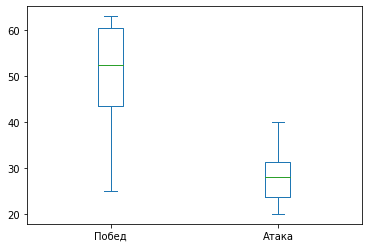

In [ ]:
df[['Побед', 'Атака']].plot(kind='box')

<AxesSubplot:>

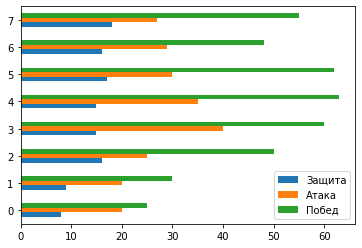

In [ ]:
df.plot(kind='barh')

На этом возможности библиотеки далеко не исчерпываются и можно обратиться к более глубокому исследованию её возможностей https://pandas.pydata.org/docs/user_guide/index.html#user-guide  

In [92]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
s1 = pd.Series([.2, .0, .6, .2])
s2 = pd.Series([.3, .6, .0, .1])
s1.corr(s2, method=histogram_intersection)


0.3

In [99]:
df['Атака'][3:-2]='wow'

<ipython-input-99-4d53ff0c5222>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Атака'][3:-2]='wow'


In [100]:
df

,Защита,Атака,Побед,Результат
0,8,20,25,слабо
1,9,wow,30,слабо
2,16,25,50,слабо
3,15,wow,60,сильно
4,15,wow,63,сильно
5,17,wow,62,сильно
6,16,29,48,слабо
7,18,27,55,сильно


# Задание

Первое исследование

- произвести наблюдение за любой компьютерной игрой
- создать набор данных
- проверить его целостность
- вслучае необходимости заполнить пропуски или убрать неполные строки
- создать таблицу описательных статистик набора данных
- создать столбец с категорией качественно характеризующий данные (много-мало, больше-меньше)
- произвести корреляционный анализ и определить наиболее значимые корреляции
- визуализировать данные
- на основе произведённых действий составить краткий рассказ раскрывающий особенности исследуемой игры (по которой собирались данные)